### Emotion Detector


In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense ,Input , Dropout,Flatten ,Conv2D
from tensorflow.keras.layers import BatchNormalization , Activation , MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image

import tensorflow as tf
print("Tensorflow version:",tf.__version__)





Tensorflow version: 2.13.0


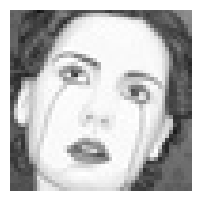

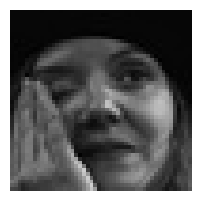

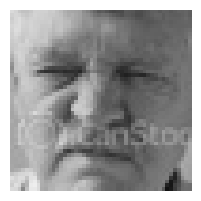

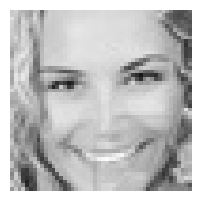

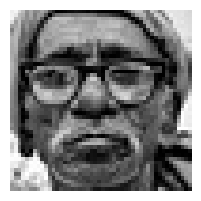

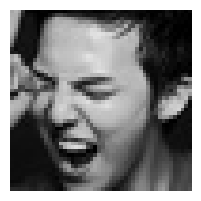

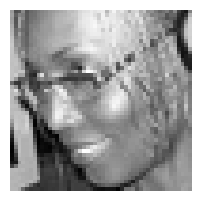

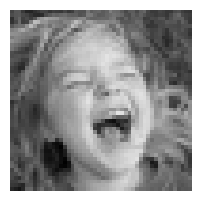

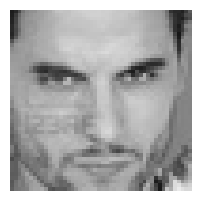

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(8,8))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')

### data training

In [3]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size =(img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode ="categorical",
                                                    shuffle =True)

img_size = 48
batch_size = 64
datagen_train= ImageDataGenerator()
test_validation = datagen_train.flow_from_directory("test/",
                                                    target_size =(img_size, img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode ="categorical",
                                                    shuffle =True)



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### defining the model

In [4]:
def Convolution(input_tensor,filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size , padding = "same")(input_tensor)
    x  = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [5]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x  = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [6]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs, 32,(3,3))
    conv_2 = Convolution(inputs, 64,(5,5))
    conv_3 = Convolution(inputs, 128,(3,3))
   
    flatten = Flatten()(conv_3)
    dense_1 = Dense_f(flatten, 256)
    
    output = Dense(7,activation ="softmax")(dense_1)
    model = Model(inputs =[inputs], outputs =[output])
    model.compile(loss = ['categorical_crossentropy'], optimizer = 'adam' , metrics =['accuracy'])
    return model

In [7]:
model = model_fer((48,48,1))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_2 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 dropout_2 (Dropout)         (None, 48, 48, 128)       0         
                                                                 
 flatten (Flatten)           (None, 294912)            0         
                                                             

### initialize the model

In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps =  validation_generator.n//validation_generator.batch_size


checkpoint = ModelCheckPoint("model_weights.h5", monitor = 'val_accuracy',save_weights_only = True , mode ='max', verbose =1)
callbacks = [checkpoint]

NameError: name 'validation_generator' is not defined